In [ ]:
import numpy as np
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation


2. Differential Equation
This is Newton's law in reduced coordinates:

In [ ]:
def diff_equation(Y, t):
    return [
        Y[2],
        Y[3],
        (-Y[0]) / pow((Y[0]**2 + Y[1]**2), 3/2),
        (-Y[1]) / pow((Y[0]**2 + Y[1]**2), 3/2)
    ]


3. Helper Functions
These convert relative motion (r) into each mass's position.

In [ ]:
# Calculate the y-bound for each eccentricity
def calc_y_bound(e_val):
    return math.sqrt(1 + e_val)

# Calculate r_1 from r
def calc_r_1(r, mass_ratio):
    q = mass_ratio / (1 + mass_ratio)
    return q * r

# Calculate r_2 from r
def calc_r_2(r, mass_ratio):
    q = mass_ratio / (1 + mass_ratio)
    return -(1 - q) * r


4. Animation Helper Function
Creates a .gif that animates the orbits.

In [1]:
def create_animation(r_1, r_2, filename, title):
    # Unpack data
    r1_x = r_1[:, 0]
    r1_y = r_1[:, 1]
    r2_x = r_2[:, 0]
    r2_y = r_2[:, 1]

    # Set up the figure and axis
    fig, ax = plt.subplots()

    # Create line objects for both data sets
    line1, = ax.plot(r1_x, r1_y, label='Smaller Mass')
    line2, = ax.plot(r2_x, r2_y, label='Larger Mass')

    # Add a legend to differentiate the lines
    ax.legend()
    plt.gca().set_aspect('equal')
    plt.title(title)

    # Update function for animation
    def update(num, x1, y1, x2, y2, line1, line2):
        line1.set_data(x1[:num], y1[:num])
        line2.set_data(x2[:num], y2[:num])
        return line1, line2

    # Create the animation
    ani = animation.FuncAnimation(
        fig, update, frames=len(r1_x), interval=25,
        fargs=(r1_x, r1_y, r2_x, r2_y, line1, line2), blit=True
    )

    # Save the animation
    ani.save(filename + ".gif", writer='pillow', fps=120)


5. Main Simulation Loop
Iterates through eccentricities and mass ratios.

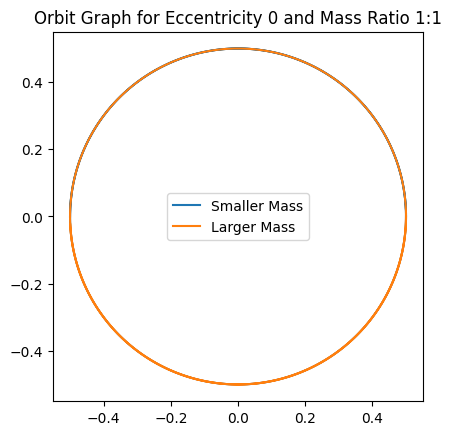

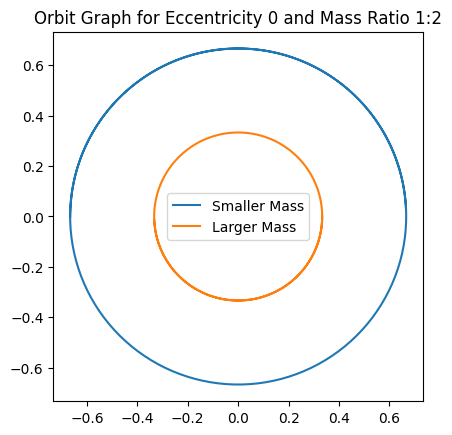

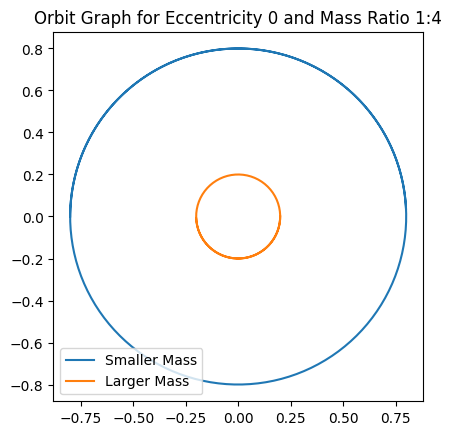

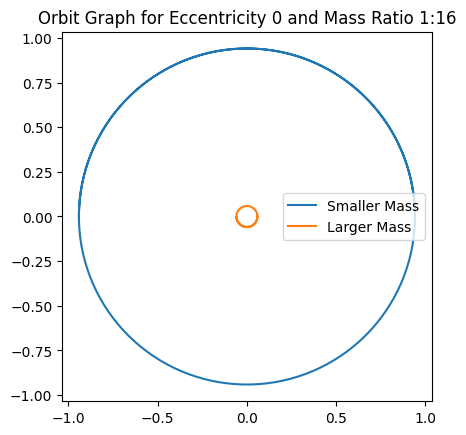

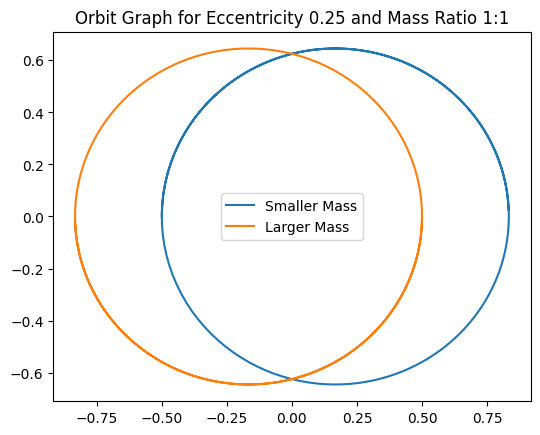

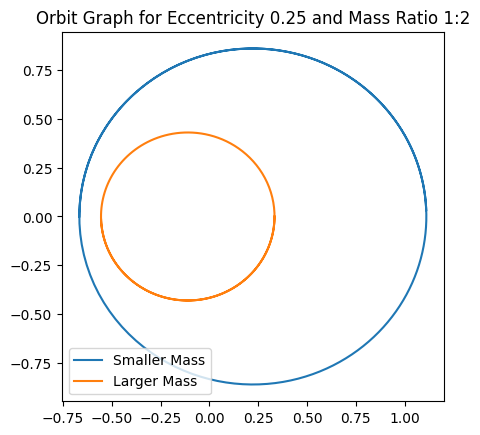

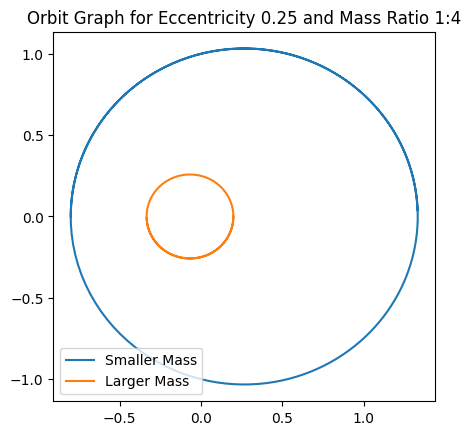

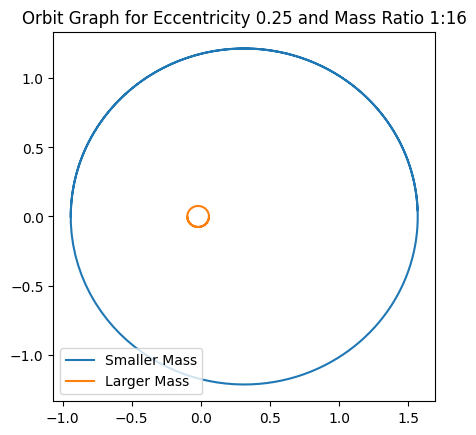

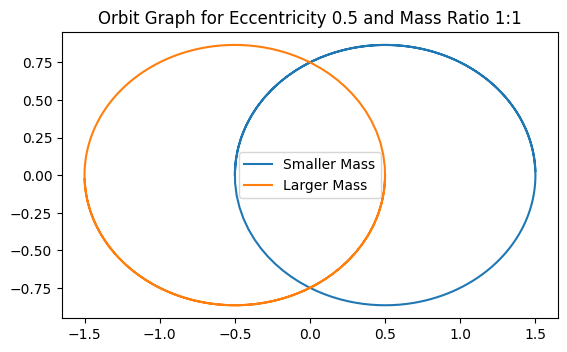

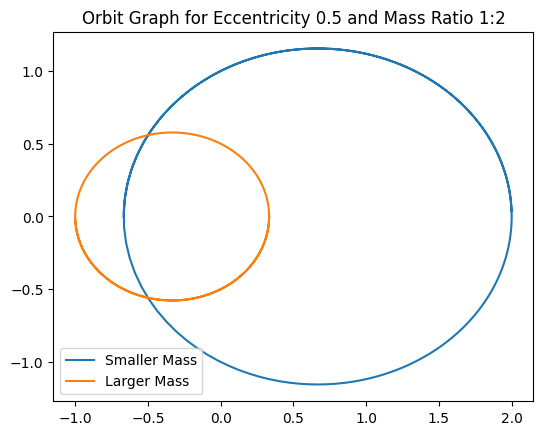

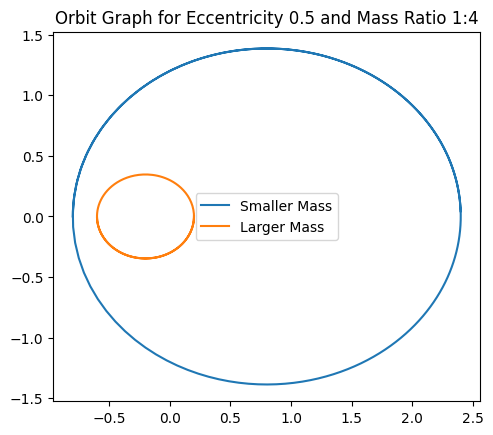

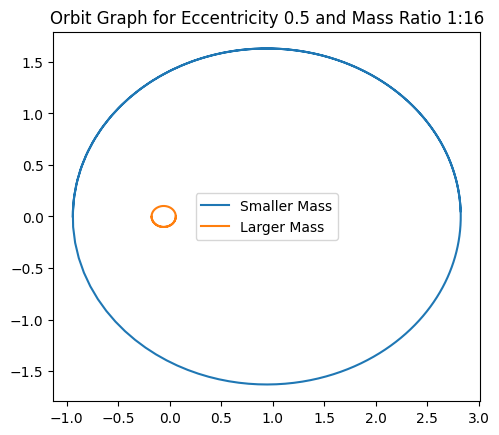

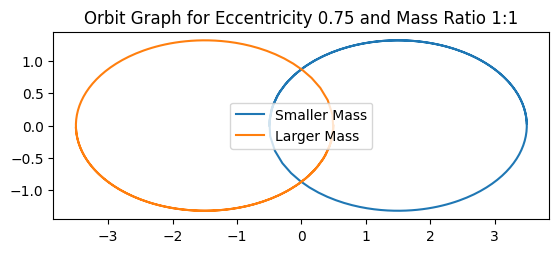

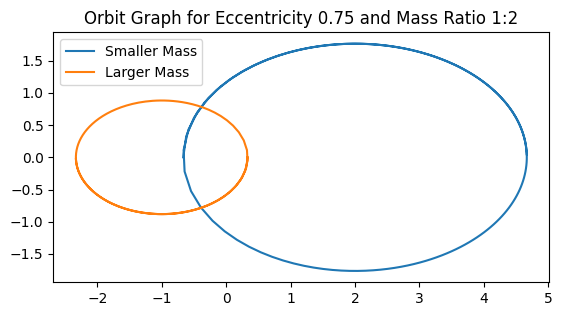

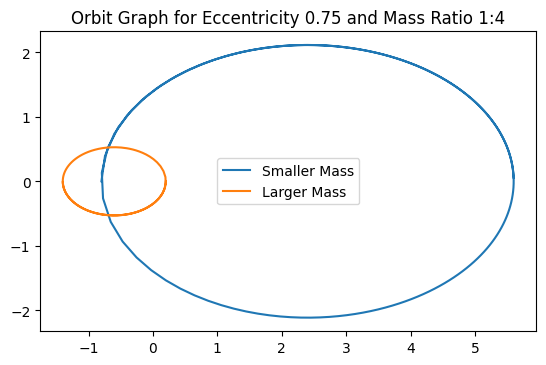

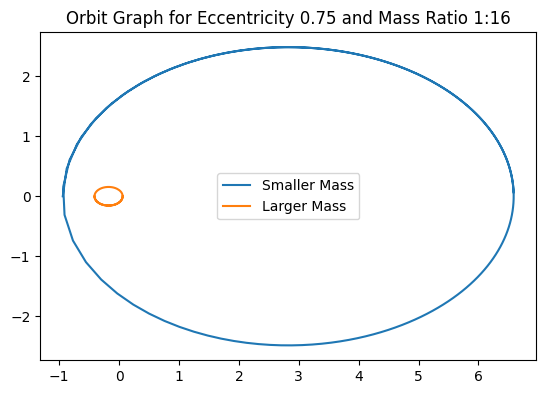

In [ ]:

e_vals = [0, 0.25, 0.5, 0.75]
mass_ratios = [1, 2, 4, 16]

for e_val in e_vals:
    T = (2 * np.pi) / (pow(1 - e_val, 3/2))
    input_space = np.linspace(0, T * 1.5, 200)

    asol = odeint(diff_equation, [-1, 0, 0, calc_y_bound(e_val)], input_space)

    for mass_ratio in mass_ratios:
        r_1 = calc_r_1(asol[:, :2], mass_ratio)
        r_2 = calc_r_2(asol[:, :2], mass_ratio)
        create_animation(
            r_1, r_2,
            filename=f"orbit_animated_e_{e_val}_ratio_{mass_ratio}",
            title=f"Orbit Graph for Eccentricity {e_val} and Mass Ratio 1:{mass_ratio}"
        )
